In [1]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet('/kaggle/input/visual-taxonomy/category_attributes.parquet', engine='pyarrow')  # or engine='fastparquet'

# Display the DataFrame
print(df)

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                      Attribute_list  
0  [color, neck, pattern, print_or_pattern_type, ...  
1  [blouse_pattern, border, border_width, color, ...  
2  [color, fit_shape, length, occasion, ornamenta...  
3  [color, fit_shape, length, pattern, print_or_p...  
4  [color, fit_shape, length, neck_collar, ocassi...  


In [2]:
import pandas as pd

# Set Pandas options to display more data
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_colwidth', None)  # Display full content in each column

# Assuming your DataFrame is already loaded
print(df)  # or df.head() if you just want the top few rows

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                                                                                                        Attribute_list  
0                                                                         [color, neck, pattern, print_or_pattern_type, sleeve_length]  
1  [blouse_pattern, border, border_width, color, occasion, ornamentation, pallu_details, pattern, print_or_pattern_type, transparency]  
2                   [color, fit_shape, length, occasion, ornamentation, pattern, print_or_pattern_type, sleeve_length, sleeve_styling]  
3                           [color, fit_shape, length, pattern, print_or_pattern_type, sleeve_length, sleeve_styling, surface_styling]  
4    [color, fit_shape, length, neck_collar, ocassion, p

# **Correcting just Sarees data**

Loaded csv file.
   id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
2   2  Men Tshirts    5     default   polo    solid    solid  short sleeves   
3   3  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
4   4  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   

  attr_6 attr_7 attr_8 attr_9 attr_10  
0    NaN    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN     NaN  


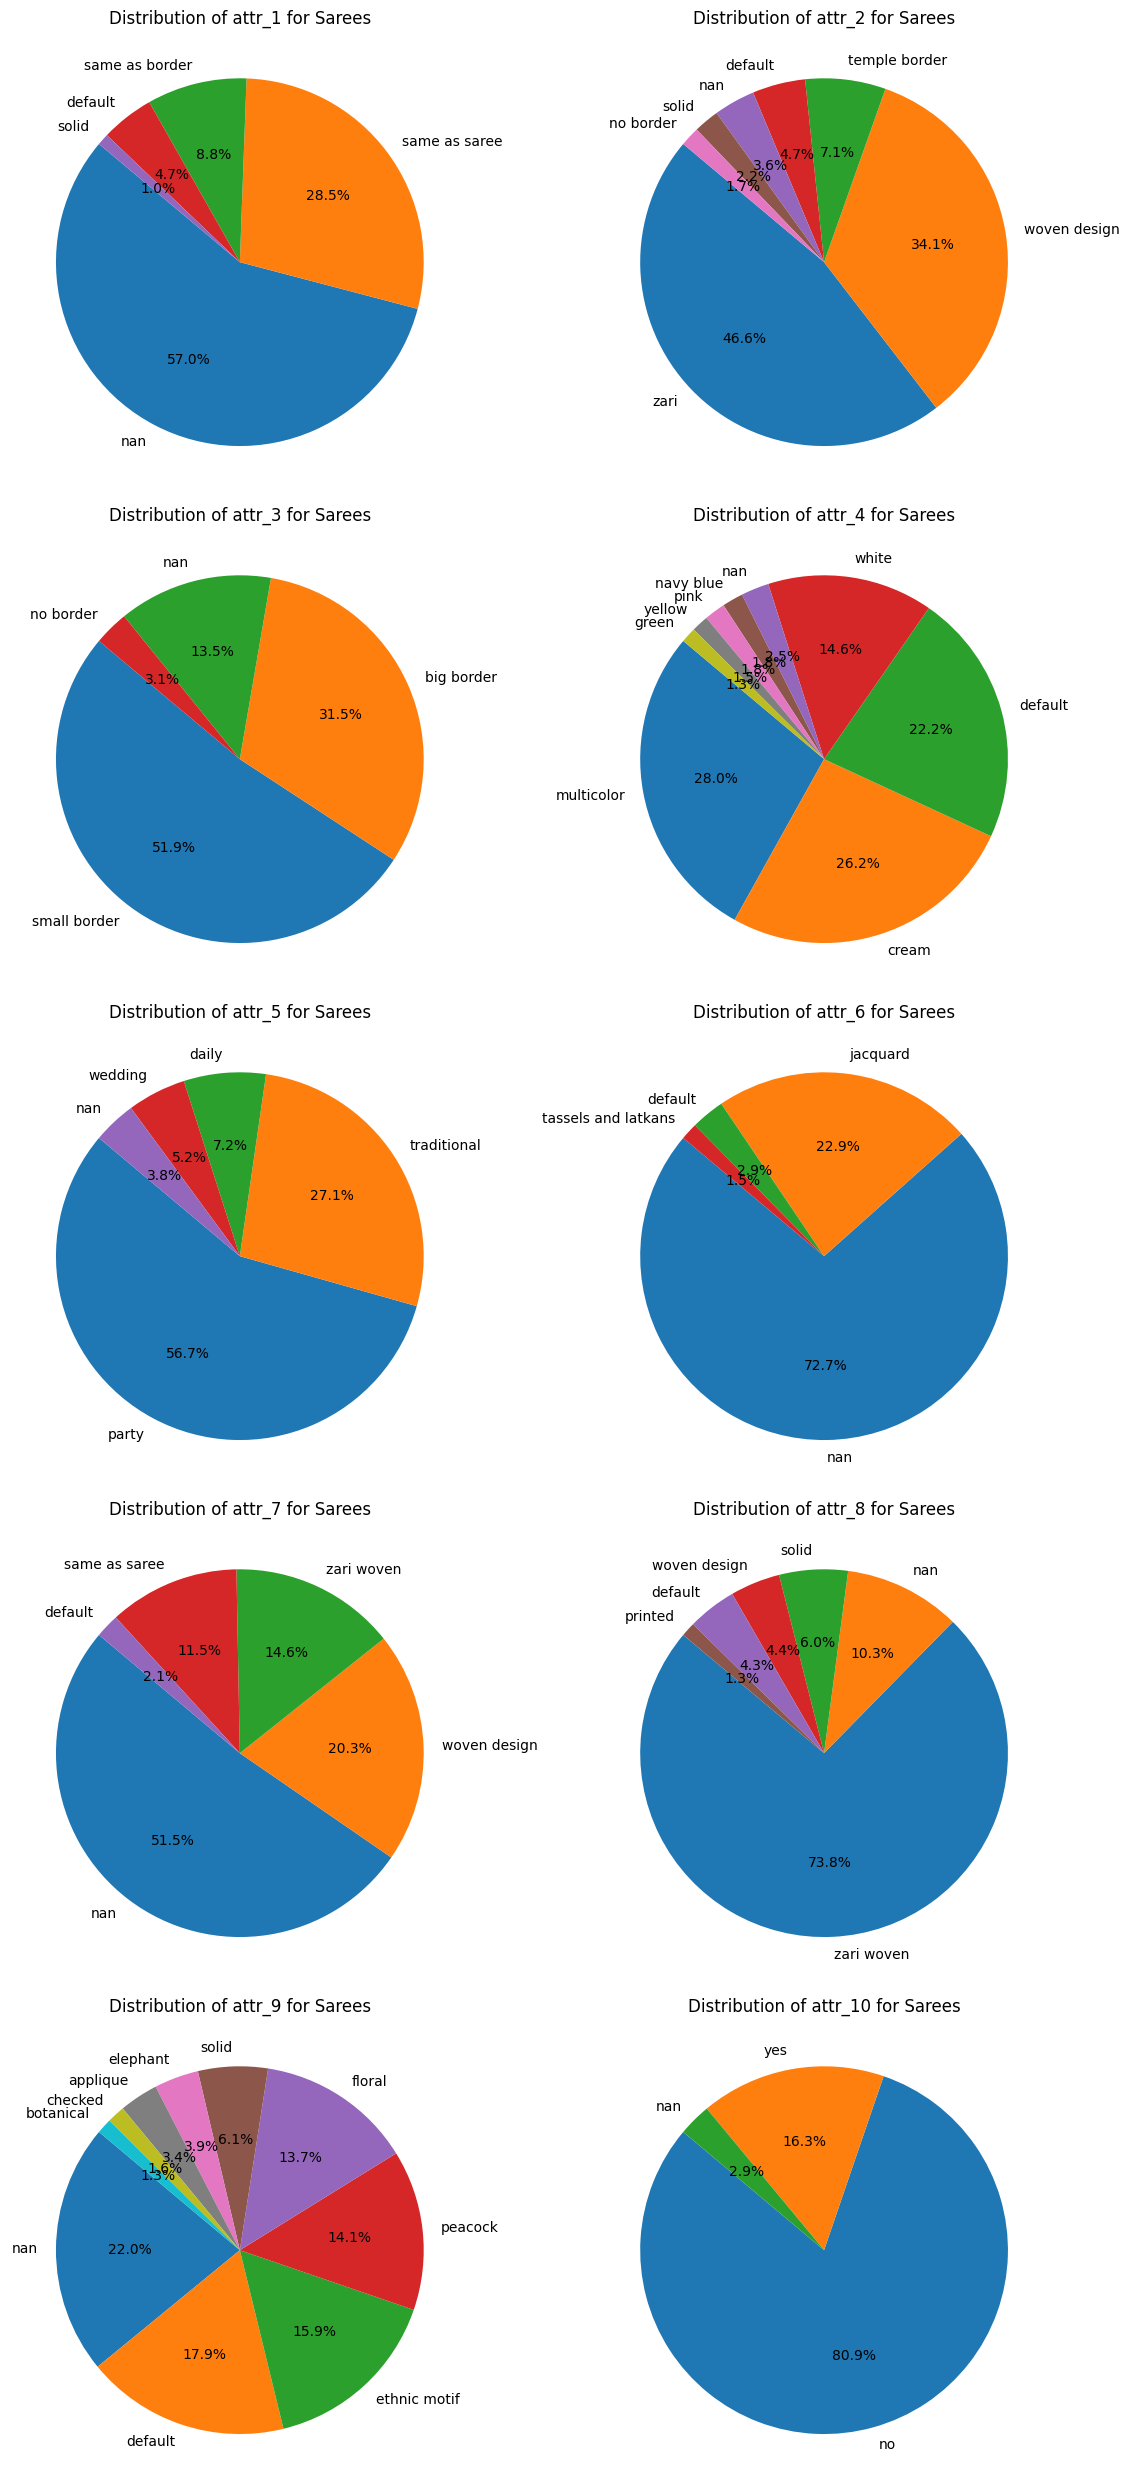

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Load the data
data = pd.read_csv('/kaggle/input/visual-taxonomy/train.csv')
print("Loaded csv file.")
print(data.head())

# Specify the target category
target_category = "Sarees"

# Filter data to include only the specified category
filtered_data = data[data['Category'] == target_category]

# Function to generate a unique color map based on the number of categories in a column
def generate_colors(n):
    color_list = list(mcolors.TABLEAU_COLORS)  # Use Tableau colors for variety
    if n <= len(color_list):
        return color_list[:n]
    else:
        return plt.cm.get_cmap('hsv', n)(range(n))  # Generate unique colors if categories exceed standard colors

# Loop through each column in the filtered data to generate pie charts
columns_to_plot = [column for column in filtered_data.columns if column not in ['id', 'Category','len']]
num_attributes = len(columns_to_plot)  # Calculate number of attributes to plot
num_rows = (num_attributes + 1) // 2  # Calculate number of rows needed (2 columns)

# Create a figure with a 2-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each column to generate pie charts
for i, column in enumerate(columns_to_plot):
    # Calculate value counts for the column, including missing values
    value_counts = filtered_data[column].value_counts(dropna=False)
    if value_counts.isnull().any():
        value_counts.index = value_counts.index.fillna('Missing')  # Label missing values as 'Missing'

    # Generate a unique color map for each pie chart
    colors = generate_colors(len(value_counts))

    # Plot pie chart on the corresponding axes
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f"Distribution of {column} for {target_category}")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Load and preprocess the data
train_csv_path = '/kaggle/input/visual-taxonomy/train.csv'
train_img_dir = '/kaggle/input/visual-taxonomy/train_images/'

# Load the labels from train.csv
data = pd.read_csv(train_csv_path)

# Filter data for "Men Tshirts" category and select the first 8 columns for attributes
target_category = "Sarees"
df = data[data['Category'] == target_category]

df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))
df = df.drop(['Category','len'], axis=1)
df.rename(columns={'attr_1': 'blouse_pattern', 'attr_2': 'border','attr_3': 'border_width','attr_4': 'color','attr_5': 'occasion','attr_6': 'ornamentation','attr_7': 'pallu_details','attr_8': 'pattern','attr_9': 'print_or_pattern_type','attr_10': 'transparency'}, inplace=True)
# df = df.fillna('dummy_value')
# df = df.dropna()
print("Done")

Done


/tmp/ipykernel_31/3020118090.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))


In [5]:
df.head()

,id,blouse_pattern,border,border_width,color,occasion,ornamentation,pallu_details,pattern,print_or_pattern_type,transparency,image_path
7267,7432,same as saree,woven design,small border,multicolor,party,jacquard,woven design,zari woven,applique,no,/kaggle/input/visual-taxonomy/train_images/007432.jpg
7268,7433,NaN,zari,small border,cream,traditional,NaN,NaN,zari woven,elephant,no,/kaggle/input/visual-taxonomy/train_images/007433.jpg
7269,7434,NaN,zari,small border,white,party,NaN,NaN,zari woven,floral,no,/kaggle/input/visual-taxonomy/train_images/007434.jpg
7270,7435,same as saree,woven design,big border,default,traditional,NaN,same as saree,zari woven,ethnic motif,no,/kaggle/input/visual-taxonomy/train_images/007435.jpg
7271,7436,solid,no border,NaN,NaN,daily,NaN,NaN,NaN,NaN,yes,/kaggle/input/visual-taxonomy/train_images/007436.jpg


In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                           0
blouse_pattern           10461
border                     667
border_width              2485
color                      450
occasion                   697
ornamentation            13336
pallu_details             9450
pattern                   1881
print_or_pattern_type     4043
transparency               528
image_path                   0
dtype: int64


In [7]:
df.shape

(18346, 12)

**70% of data is missing. So let us try to impute certain values there using models**

In [8]:
train_df=df

In [9]:
# Function to load and preprocess image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Example function to create a CNN-based model for imputation
def create_imputer_model(output_classes):
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze backbone for initial training
    
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(output_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']

# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    
    # Fit and transform only non-missing values
    non_missing = train_df[col].dropna()
    train_df.loc[train_df[col].notna(), col] = le.fit_transform(non_missing)
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))
    
    # Ensure missing values are restored as NaN in the DataFrame
    train_df[col] = train_df[col].astype(float)  # Ensure NaN compatibility
    train_df.loc[train_df[col].isnull(), col] = np.nan
    
print("Encoded DataFrame:")
print(train_df.head())
print("\nLabel Mappings:")
print(label_mappings)


Encoded DataFrame:
        id  blouse_pattern  border  border_width  color  occasion  \
7267  7432             2.0     4.0           2.0    3.0       1.0   
7268  7433             NaN     5.0           2.0    0.0       2.0   
7269  7434             NaN     5.0           2.0    6.0       1.0   
7270  7435             2.0     4.0           0.0    1.0       2.0   
7271  7436             3.0     1.0           NaN    NaN       0.0   

      ornamentation  pallu_details  pattern  print_or_pattern_type  \
7267            1.0            2.0      4.0                    0.0   
7268            NaN            NaN      4.0                    4.0   
7269            NaN            NaN      4.0                    6.0   
7270            NaN            1.0      4.0                    5.0   
7271            NaN            NaN      NaN                    NaN   

      transparency                                             image_path  
7267           0.0  /kaggle/input/visual-taxonomy/train_images/007432

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from tensorflow.keras.backend import clear_session


In [12]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Constants for image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# For each attribute, filter data, train model, and impute missing values
for attribute in ['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 'ornamentation']:
    # Filter data for attribute (only rows where this attribute is not missing)
    subset = train_df.dropna(subset=[attribute])
    
    # Limit the number of rows to 10,000 if it exceeds that count
    if len(subset) > 8000:
        subset = subset.sample(n=8000, random_state=42)
        print("triggered")
    
    # Load and preprocess images
    X = np.array([preprocess_image(img_path) for img_path in subset['image_path']])
    y = subset[attribute].values
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the CNN-based model
    model = create_imputer_model(output_classes=len(label_mappings[attribute]))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=BATCH_SIZE)
    
    
    
    # Impute missing values
    missing_subset = train_df[train_df[attribute].isnull()]
    batch_size = len(missing_subset)//20  # Adjust batch size according to available memory

    if not missing_subset.empty:
        print("Starting prediction for missing values...")

        # Initialize an empty list to collect predictions
        y_missing_pred = []

        # Process X_missing in batches
        for start in range(0, len(missing_subset), batch_size):
            end = min(start + batch_size, len(missing_subset))

            print(f"Processing batch from {start} to {end}")

            # Preprocess the images in the current batch
            X_batch = np.array([preprocess_image(img_path) for img_path in missing_subset['image_path'][start:end]])

            # Predict for the current batch
            y_batch_pred = model.predict(X_batch).argmax(axis=1)

            # Append the batch predictions to the main list
            y_missing_pred.extend(y_batch_pred)

    # Convert to numpy array if needed, then update the DataFrame
    y_missing_pred = np.array(y_missing_pred)

    print(f"Predicted: {attribute}")
    train_df.loc[train_df[attribute].isnull(), attribute] = y_missing_pred
        
# Now train the final model on the fully imputed dataset with images and attributes

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


I0000 00:00:1730830380.164208     111 service.cc:145] XLA service 0x7e07f014e620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730830380.164269     111 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730830380.164275     111 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/198 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.2500 - loss: 1.7376 

I0000 00:00:1730830385.991433     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


198/198 ━━━━━━━━━━━━━━━━━━━━ 42s 151ms/step - accuracy: 0.6480 - loss: 0.9580 - val_accuracy: 0.6912 - val_loss: 0.6545
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.7198 - loss: 0.5823 - val_accuracy: 0.7039 - val_loss: 0.6065
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.7426 - loss: 0.5420 - val_accuracy: 0.7096 - val_loss: 0.6206
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.7413 - loss: 0.5399 - val_accuracy: 0.6944 - val_loss: 0.6145
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.7395 - loss: 0.5342 - val_accuracy: 0.7083 - val_loss: 0.6319
Starting prediction for missing values...
Processing batch from 0 to 523
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step
Processing batch from 523 to 1046
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Processing batch from 1046 to 1569
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Processing batch from 1569 to 2092
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Processing batch from 

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Constants for image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# For each attribute, filter data, train model, and impute missing values
for attribute in ['pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']:
    # Filter data for attribute (only rows where this attribute is not missing)
    subset = train_df.dropna(subset=[attribute])
    
    # Limit the number of rows to 10,000 if it exceeds that count
    if len(subset) > 8000:
        subset = subset.sample(n=8000, random_state=42)
        print("triggered")
    
    # Load and preprocess images
    X = np.array([preprocess_image(img_path) for img_path in subset['image_path']])
    y = subset[attribute].values
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the CNN-based model
    model = create_imputer_model(output_classes=len(label_mappings[attribute]))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=BATCH_SIZE)
    
    
    
    # Impute missing values
    missing_subset = train_df[train_df[attribute].isnull()]
    batch_size = len(missing_subset)//20  # Adjust batch size according to available memory

    if not missing_subset.empty:
        print("Starting prediction for missing values...")

        # Initialize an empty list to collect predictions
        y_missing_pred = []

        # Process X_missing in batches
        for start in range(0, len(missing_subset), batch_size):
            end = min(start + batch_size, len(missing_subset))

            print(f"Processing batch from {start} to {end}")

            # Preprocess the images in the current batch
            X_batch = np.array([preprocess_image(img_path) for img_path in missing_subset['image_path'][start:end]])

            # Predict for the current batch
            y_batch_pred = model.predict(X_batch).argmax(axis=1)

            # Append the batch predictions to the main list
            y_missing_pred.extend(y_batch_pred)

    # Convert to numpy array if needed, then update the DataFrame
    y_missing_pred = np.array(y_missing_pred)

    print(f"Predicted: {attribute}")
    train_df.loc[train_df[attribute].isnull(), attribute] = y_missing_pred
        
# Now train the final model on the fully imputed dataset with images and attributes

triggered
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 0.5513 - loss: 1.1439 - val_accuracy: 0.6425 - val_loss: 0.8593
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - accuracy: 0.6463 - loss: 0.8260 - val_accuracy: 0.6306 - val_loss: 0.8335
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.6548 - loss: 0.7993 - val_accuracy: 0.6281 - val_loss: 0.8490
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.6573 - loss: 0.7661 - val_accuracy: 0.6306 - val_loss: 0.8365
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.6558 - loss: 0.7780 - val_accuracy: 0.6500 - val_loss: 0.8171
Starting prediction for missing values...
Processing batch from 0 to 472
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 465ms/step
Processing batch from 472 to 944
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Processing batch from 944 to 1416
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Processing batch from 1416 to 1888
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Proc

In [14]:
missing_values = train_df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                       0
blouse_pattern           0
border                   0
border_width             0
color                    0
occasion                 0
ornamentation            0
pallu_details            0
pattern                  0
print_or_pattern_type    0
transparency             0
image_path               0
dtype: int64


In [15]:
label_mappings

{'blouse_pattern': {0: 'default',
  1: 'same as border',
  2: 'same as saree',
  3: 'solid'},
 'border': {0: 'default',
  1: 'no border',
  2: 'solid',
  3: 'temple border',
  4: 'woven design',
  5: 'zari'},
 'border_width': {0: 'big border', 1: 'no border', 2: 'small border'},
 'color': {0: 'cream',
  1: 'default',
  2: 'green',
  3: 'multicolor',
  4: 'navy blue',
  5: 'pink',
  6: 'white',
  7: 'yellow'},
 'occasion': {0: 'daily', 1: 'party', 2: 'traditional', 3: 'wedding'},
 'ornamentation': {0: 'default', 1: 'jacquard', 2: 'tassels and latkans'},
 'pallu_details': {0: 'default',
  1: 'same as saree',
  2: 'woven design',
  3: 'zari woven'},
 'pattern': {0: 'default',
  1: 'printed',
  2: 'solid',
  3: 'woven design',
  4: 'zari woven'},
 'print_or_pattern_type': {0: 'applique',
  1: 'botanical',
  2: 'checked',
  3: 'default',
  4: 'elephant',
  5: 'ethnic motif',
  6: 'floral',
  7: 'peacock',
  8: 'solid'},
 'transparency': {0: 'no', 1: 'yes'}}

In [16]:
# Convert float columns to int before mapping
for column, mapping in label_mappings.items():
    train_df[column] = train_df[column].astype(int).map(mapping)

In [17]:
train_df.head()

,id,blouse_pattern,border,border_width,color,occasion,ornamentation,pallu_details,pattern,print_or_pattern_type,transparency,image_path
7267,7432,same as saree,woven design,small border,multicolor,party,jacquard,woven design,zari woven,applique,no,/kaggle/input/visual-taxonomy/train_images/007432.jpg
7268,7433,same as saree,zari,small border,cream,traditional,jacquard,woven design,zari woven,elephant,no,/kaggle/input/visual-taxonomy/train_images/007433.jpg
7269,7434,same as saree,zari,small border,white,party,jacquard,woven design,zari woven,floral,no,/kaggle/input/visual-taxonomy/train_images/007434.jpg
7270,7435,same as saree,woven design,big border,default,traditional,jacquard,same as saree,zari woven,ethnic motif,no,/kaggle/input/visual-taxonomy/train_images/007435.jpg
7271,7436,solid,no border,small border,default,daily,default,same as saree,printed,default,yes,/kaggle/input/visual-taxonomy/train_images/007436.jpg


# **Checking model accuracy after imputation**

In [18]:
df=train_df

In [19]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']
# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    # Fit and transform the column to integer codes
    df[col] = le.fit_transform(df[col])
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))

print("Encoded DataFrame:")
print(df.head())
print("\nLabel Mappings:")
print(label_mappings)

Encoded DataFrame:
        id  blouse_pattern  border  border_width  color  occasion  \
7267  7432               2       4             2      3         1   
7268  7433               2       5             2      0         2   
7269  7434               2       5             2      6         1   
7270  7435               2       4             0      1         2   
7271  7436               3       1             2      1         0   

      ornamentation  pallu_details  pattern  print_or_pattern_type  \
7267              1              2        4                      0   
7268              1              2        4                      4   
7269              1              2        4                      6   
7270              1              1        4                      5   
7271              0              1        1                      3   

      transparency                                             image_path  
7267             0  /kaggle/input/visual-taxonomy/train_images/007432

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Split the data for training and validation
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Define image parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Standard image size for CNN models
BATCH_SIZE = 32

# Data generator for real-time data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train and validation data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 
           'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 
           'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)

# Model Architecture
def build_model():
    # Shared Backbone
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the backbone initially

    # Global feature extractor
    x = layers.GlobalAveragePooling2D()(base_model.output)

    # Attribute-specific heads
    blouse_pattern_head = layers.Dense(128, activation='relu')(x)
    blouse_pattern_head = layers.Dense(num_classes['blouse_pattern'], activation='softmax', name='blouse_pattern')(blouse_pattern_head)
    
    border_head = layers.Dense(128, activation='relu')(x)
    border_head = layers.Dense(num_classes['border'], activation='softmax', name='border')(border_head)
    
    border_width_head = layers.Dense(128, activation='relu')(x)
    border_width_head = layers.Dense(num_classes['border_width'], activation='softmax', name='border_width')(border_width_head)
    
    color_head = layers.Dense(128, activation='relu')(x)
    color_head = layers.Dense(num_classes['color'], activation='softmax', name='color')(color_head)
    
    occasion_head = layers.Dense(128, activation='relu')(x)
    occasion_head = layers.Dense(num_classes['occasion'], activation='softmax', name='occasion')(occasion_head)
    
    ornamentation_head = layers.Dense(128, activation='relu')(x)
    ornamentation_head = layers.Dense(num_classes['ornamentation'], activation='softmax', name='ornamentation')(ornamentation_head)
    
    pallu_details_head = layers.Dense(128, activation='relu')(x)
    pallu_details_head = layers.Dense(num_classes['pallu_details'], activation='softmax', name='pallu_details')(pallu_details_head)
    
    pattern_head = layers.Dense(128, activation='relu')(x)
    pattern_head = layers.Dense(num_classes['pattern'], activation='softmax', name='pattern')(pattern_head)
    
    print_type_head = layers.Dense(128, activation='relu')(x)
    print_type_head = layers.Dense(num_classes['print_or_pattern_type'], activation='softmax', name='print_or_pattern_type')(print_type_head)
    
    transparency_head = layers.Dense(128, activation='relu')(x)
    transparency_head = layers.Dense(num_classes['transparency'], activation='softmax', name='transparency')(transparency_head)

    # Define the model
    model = models.Model(inputs=base_model.input, outputs=[
        blouse_pattern_head, border_head, border_width_head, color_head,
        occasion_head, ornamentation_head, pallu_details_head, pattern_head,
        print_type_head, transparency_head
    ])
    
    return model

# Number of classes for each attribute
num_classes = {
    'blouse_pattern': df['blouse_pattern'].nunique(),
    'border': df['border'].nunique(),
    'border_width': df['border_width'].nunique(),
    'color': df['color'].nunique(),
    'occasion': df['occasion'].nunique(),
    'ornamentation': df['ornamentation'].nunique(),
    'pallu_details': df['pallu_details'].nunique(),
    'pattern': df['pattern'].nunique(),
    'print_or_pattern_type': df['print_or_pattern_type'].nunique(),
    'transparency': df['transparency'].nunique()
}

# Instantiate and compile the model
model = build_model()


Found 16511 validated image filenames.
Found 1835 validated image filenames.


In [21]:
import tensorflow as tf

def create_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]

            # Labels as a tuple of individual attributes for the Saree dataset
            labels = (
                row['blouse_pattern'],
                row['border'],
                row['border_width'],
                row['color'],
                row['occasion'],
                row['ornamentation'],
                row['pallu_details'],
                row['pattern'],
                row['print_or_pattern_type'],
                row['transparency']
            )
            yield img, labels

    # Set the output signature for TensorFlow to understand the data types and shapes
    output_signature = (
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32),  # Image shape and dtype
        (
            tf.TensorSpec(shape=(), dtype=tf.int32),  # color
            tf.TensorSpec(shape=(), dtype=tf.int32),  # neck
            tf.TensorSpec(shape=(), dtype=tf.int32),  # pattern
            tf.TensorSpec(shape=(), dtype=tf.int32),  # print_or_pattern_type
            tf.TensorSpec(shape=(), dtype=tf.int32),  # sleeve_length
            tf.TensorSpec(shape=(), dtype=tf.int32),  # color
            tf.TensorSpec(shape=(), dtype=tf.int32),  # neck
            tf.TensorSpec(shape=(), dtype=tf.int32),  # pattern
            tf.TensorSpec(shape=(), dtype=tf.int32),  # print_or_pattern_type
            tf.TensorSpec(shape=(), dtype=tf.int32),  # sleeve_length
        )
    )

    # Create the dataset from the generator
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Create train and validation datasets
train_dataset = create_dataset(train_df, BATCH_SIZE)
val_dataset = create_dataset(val_df, BATCH_SIZE)

In [22]:
train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()

In [23]:
# Phase 1: Unfreeze the backbone and all layers
for layer in model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning on the Saree dataset
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss={
        'blouse_pattern': 'sparse_categorical_crossentropy',
        'border': 'sparse_categorical_crossentropy',
        'border_width': 'sparse_categorical_crossentropy',
        'color': 'sparse_categorical_crossentropy',
        'occasion': 'sparse_categorical_crossentropy',
        'ornamentation': 'sparse_categorical_crossentropy',
        'pallu_details': 'sparse_categorical_crossentropy',
        'pattern': 'sparse_categorical_crossentropy',
        'print_or_pattern_type': 'sparse_categorical_crossentropy',
        'transparency': 'sparse_categorical_crossentropy'
    },
    metrics={
        'blouse_pattern': ['accuracy'],
        'border': ['accuracy'],
        'border_width': ['accuracy'],
        'color': ['accuracy'],
        'occasion': ['accuracy'],
        'ornamentation': ['accuracy'],
        'pallu_details': ['accuracy'],
        'pattern': ['accuracy'],
        'print_or_pattern_type': ['accuracy'],
        'transparency': ['accuracy']
    }
)

initial_epochs = 10

history_phase1 = model.fit(
    train_dataset,
    epochs=initial_epochs,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    validation_data=val_dataset,
    validation_steps=len(val_df) // BATCH_SIZE,
    verbose=1
)

Epoch 1/10


I0000 00:00:1730832524.325044     109 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_37', 20 bytes spill stores, 20 bytes spill loads



515/515 ━━━━━━━━━━━━━━━━━━━━ 331s 512ms/step - blouse_pattern_accuracy: 0.8366 - border_accuracy: 0.6476 - border_width_accuracy: 0.8684 - color_accuracy: 0.5026 - loss: 6.3288 - occasion_accuracy: 0.6643 - ornamentation_accuracy: 0.9216 - pallu_details_accuracy: 0.7884 - pattern_accuracy: 0.8145 - print_or_pattern_type_accuracy: 0.6959 - transparency_accuracy: 0.8201 - val_blouse_pattern_accuracy: 0.7823 - val_border_accuracy: 0.0625 - val_border_width_accuracy: 0.5576 - val_color_accuracy: 0.2363 - val_loss: 14.4353 - val_occasion_accuracy: 0.3931 - val_ornamentation_accuracy: 0.1146 - val_pallu_details_accuracy: 0.2445 - val_pattern_accuracy: 0.7122 - val_print_or_pattern_type_accuracy: 0.2752 - val_transparency_accuracy: 0.8229
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 291s 503ms/step - blouse_pattern_accuracy: 0.8771 - border_accuracy: 0.7073 - border_width_accuracy: 0.9049 - color_accuracy: 0.5545 - loss: 5.0707 - occasion_accuracy: 0.7164 - ornamentation_accuracy: 0.9656 - pallu_d

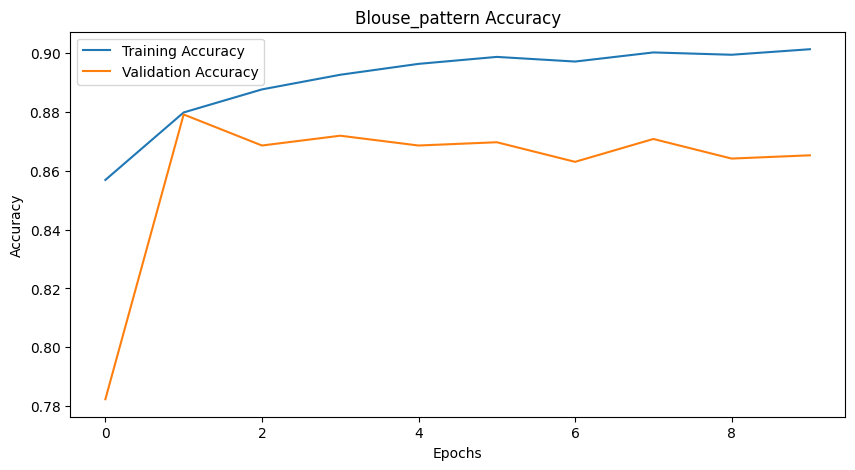

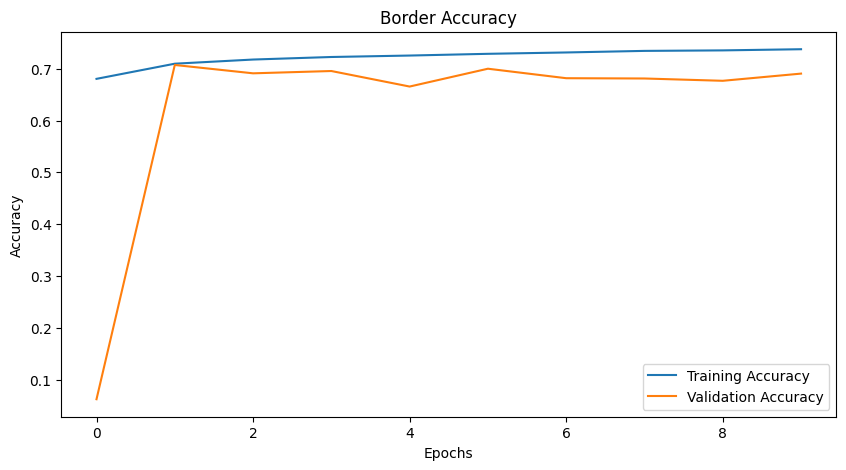

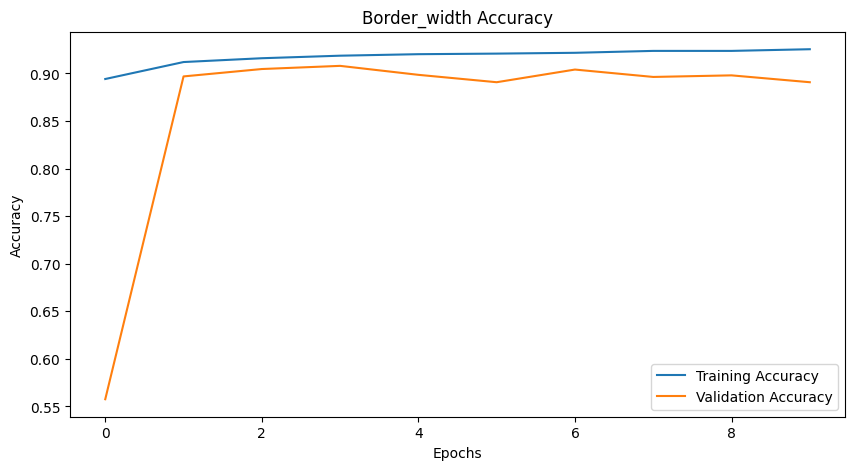

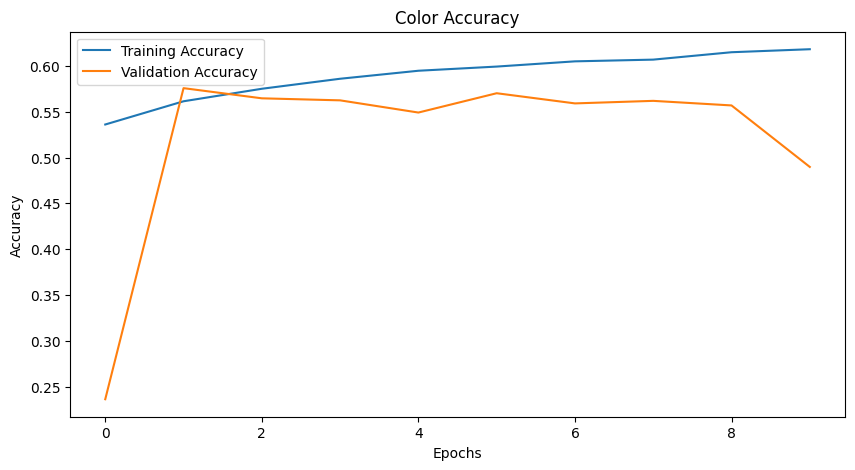

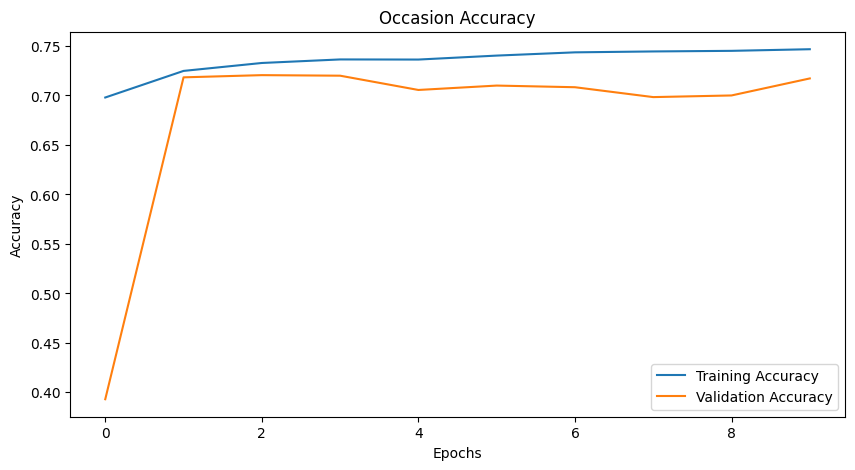

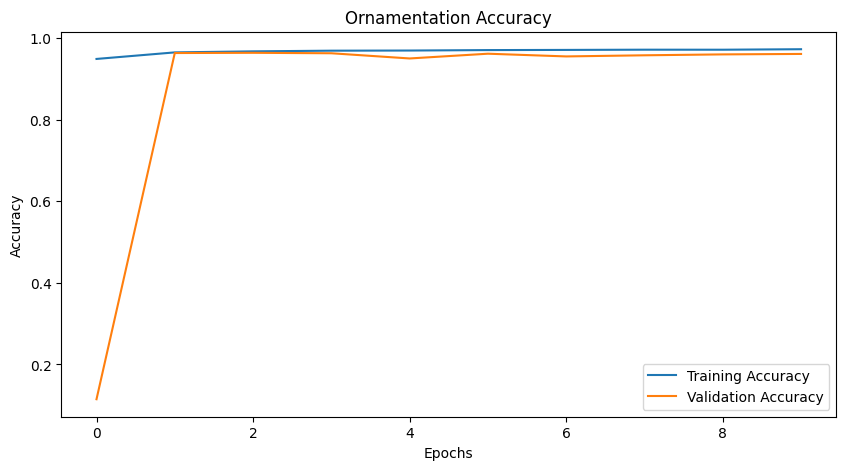

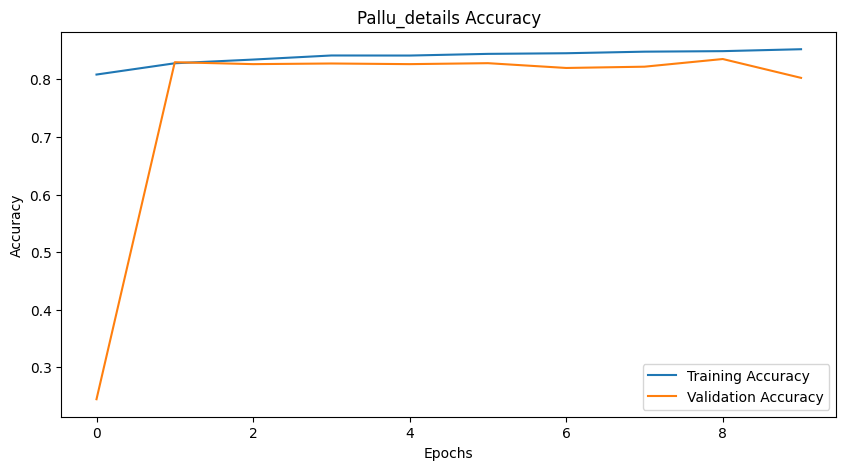

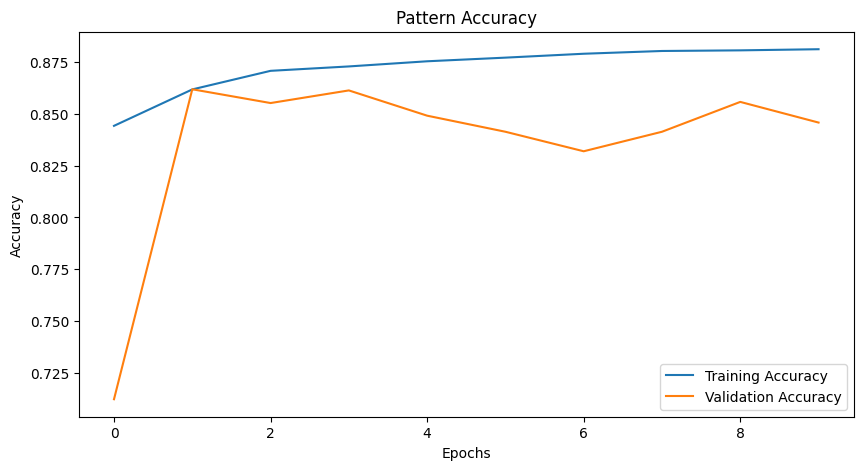

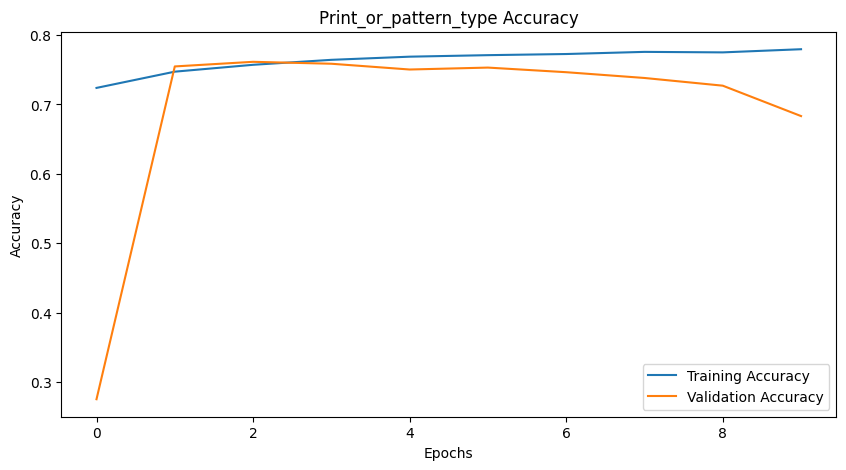

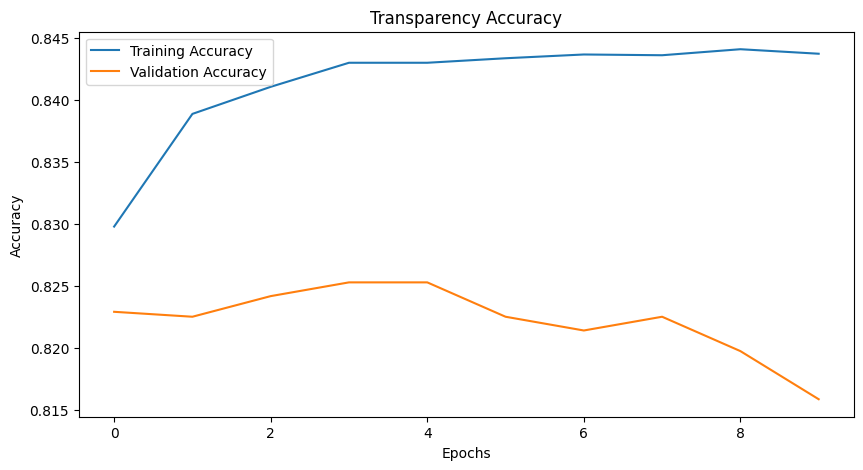

In [24]:
import matplotlib.pyplot as plt

# Define the names for each output
output_names = ['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']

# Create a plot for each output
for output_name in output_names:
    plt.figure(figsize=(10, 5))
    
    # Plot training accuracy
    plt.plot(history_phase1.history[f'{output_name}_accuracy'], label='Training Accuracy')
    
    # Plot validation accuracy
    plt.plot(history_phase1.history[f'val_{output_name}_accuracy'], label='Validation Accuracy')
    
    # Set plot title and labels
    plt.title(f'{output_name.capitalize()} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Show the plot
    plt.show()

# **Let us predict the images in test.csv**

In [26]:
import pandas as pd
import tensorflow as tf

# Load the test.csv and filter for the target category
test_csv_path = '/kaggle/input/visual-taxonomy/test.csv'
test_img_dir = '/kaggle/input/visual-taxonomy/test_images/'

# Load and filter the data
test_data = pd.read_csv(test_csv_path)
test_data = test_data[test_data['Category'] == target_category]

# Create image paths
test_data['image_path'] = test_data['id'].apply(lambda x: os.path.join(test_img_dir, f"{x:06d}.jpg"))


In [27]:
test_data.head()

,id,Category,image_path
3787,3787,Sarees,/kaggle/input/visual-taxonomy/test_images/003787.jpg
3788,3788,Sarees,/kaggle/input/visual-taxonomy/test_images/003788.jpg
3789,3789,Sarees,/kaggle/input/visual-taxonomy/test_images/003789.jpg
3790,3790,Sarees,/kaggle/input/visual-taxonomy/test_images/003790.jpg
3791,3791,Sarees,/kaggle/input/visual-taxonomy/test_images/003791.jpg


In [28]:
# Function to create a dataset from test images
def create_test_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]
            yield img

    output_signature = tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32)
    
    # Create the dataset
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [29]:
# Initialize submission DataFrame with columns 'id', 'Category', 'len', and the attribute columns
submission = pd.DataFrame(columns=['id', 'Category', 'len','blouse_pattern', 'border', 'border_width', 'color', 'occasion','ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency'])

# Set 'Category' and 'len' columns
submission['Category'] = target_category
submission['len'] = 10

# Loop over each image in the test data
for index, row in test_data.iterrows():
    # Load and preprocess the image
    img_path = os.path.join(test_img_dir, f"{row['id']:06d}.jpg")
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0  # Normalize
    img_batch = tf.expand_dims(img, 0)  # Add batch dimension

    # Predict using the model
    predicted_outputs = model.predict(img_batch,verbose=0)

    # Decode predictions using label mappings
    predicted_attributes = []
    for i, col in enumerate(['blouse_pattern', 'border', 'border_width', 'color', 'occasion','ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']):
        predicted_label_idx = np.argmax(predicted_outputs[i], axis=1)[0]
        predicted_label = label_mappings[col][predicted_label_idx]
        predicted_attributes.append(predicted_label)

    # Append the results to the submission DataFrame
    submission = pd.concat([submission, pd.DataFrame([[row['id'], target_category, 10] + predicted_attributes],
                                                     columns=submission.columns)], ignore_index=True)


In [30]:
submission.head()

,id,Category,len,blouse_pattern,border,border_width,color,occasion,ornamentation,pallu_details,pattern,print_or_pattern_type,transparency
0,3787,Sarees,10,default,default,small border,default,daily,jacquard,same as saree,zari woven,default,no
1,3788,Sarees,10,same as saree,default,small border,default,daily,jacquard,zari woven,zari woven,default,no
2,3789,Sarees,10,same as saree,woven design,big border,default,party,jacquard,same as saree,zari woven,default,no
3,3790,Sarees,10,default,woven design,big border,default,traditional,jacquard,zari woven,zari woven,default,no
4,3791,Sarees,10,same as saree,woven design,no border,multicolor,traditional,jacquard,zari woven,zari woven,default,no


In [31]:
# Rename the columns ['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 
           # 'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']
submission.rename(columns={
    'blouse_pattern': 'attr_1', 
    'border': 'attr_2', 
    'border_width': 'attr_3', 
    'color': 'attr_4', 
    'occasion': 'attr_5',
    'ornamentation': 'attr_6',
    'pallu_details': 'attr_7',
    'pattern': 'attr_8',
    'print_or_pattern_type': 'attr_9',
    'transparency': 'attr_10'
}, inplace=True)

# # Add columns attr_6 to attr_10 with "dummy_value"
# for i in range(6, 11):
#     submission[f'attr_{i}'] = "dummy_value"

# Save the modified DataFrame to CSV
output_path = "/kaggle/working/submissionSareesFinal.csv"
submission.to_csv(output_path, index=False)

print(f"File saved successfully at {output_path}")


File saved successfully at /kaggle/working/submissionSareesFinal.csv
